# **1. PROBLEMA**

## **1.1. Contexto**

**Dataset:**

El conjunto de datos fue descargado de una base de datos de clientes de un banco.

**Objetivo:**

> Se necesita realizar un informe sobre las caracteristicas de los clientes del banco.

**Desarrollo:**

➡️ Realice un análisis estadístico del conjunto de datos entregado por la empresa.

➡️ Interprete cada tabla y gráfico.

➡️ Realice sus propios cálculos y gráficos adicionales si lo considera necesario para descubrir más información.

**Mario Ayavire A.**


## **1.2. Librerías**

In [96]:
# OPERACIONES CON ARREGLOS (MATRICES Y VECTORES)
import numpy as np

# ESTRUCTURA Y MANIPULACIÓN DE DATOS
import pandas as pd

# VISUALIZACIÓN
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sb
# Configura el estilo de seaborn para desactivar la notación científica
sb.set(style="ticks", rc={'axes.formatter.limits': (-2, 10)})
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot

# ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

## **1.3. Carga de datos**



---



🟠 **GOOGLE COLABORATORY** 🟠

**Opción 1:** Subir el archivo a Colab directamente en la carpeta "Archivos". (Advertencia: El archivo se elimina luego que se desconecta el entorno de ejecución por lo que no es recomendable para tareas que requieren mucho tiempo de trabajo)

In [97]:
df = pd.read_excel("clientes_limpio.xlsx")

# **2. EXPLORACIÓN INICIAL**



---



Visualización del dataset:

In [4]:
#Primeros registros
df.head()

,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual
0,Accidente,Femenino,Buin,Metropolitana,Soltero(a),Técnico,5,1000000,530661
1,Accidente,Femenino,Puerto Montt,Los Lagos,Soltero(a),Técnico,1,1000000,904428
2,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Técnico,0,1000000,704975
3,Accidente,Femenino,Concepción,Biobío,Casado(a),Técnico,4,1000000,767575
4,Accidente,Femenino,Concepción,Biobío,Soltero(a),Técnico,4,1000000,995146


In [5]:
#Ultimos registros
df.tail()

,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual
197852,Accidente,Femenino,Rancagua,O'Higgins,Soltero(a),Universitario,0,2000000,2292900
197853,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Universitario,1,2000000,1802600
197854,Accidente,Femenino,Valparaíso,Valparaíso,Viudo(a),Universitario,2,2000000,2023700
197855,Accidente,Femenino,Valparaíso,Valparaíso,Viudo(a),Universitario,1,2000000,2731300
197856,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Universitario,0,2000000,2916700


In [6]:
#Muestra aleatoria
df.sample(10)

,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual
20403,Automotriz,Masculino,Santiago,Metropolitana,Soltero(a),Media,4,500000,920203
143063,Automotriz,Masculino,Osorno,Los Lagos,Soltero(a),Magister,5,3500000,5964990
121055,Automotriz,Masculino,Santiago,Metropolitana,Soltero(a),Doctorado,1,3000000,6428740
47229,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Media,2,500000,745291
160130,Vida,Femenino,Temuco,Araucanía,Soltero(a),Media,1,500000,846701
53705,Desgravamen,Femenino,Santiago,Metropolitana,Casado(a),Técnico,1,1000000,894732
26720,Desgravamen,Masculino,Rancagua,O'Higgins,Soltero(a),Técnico,5,1000000,569885
7372,Robo,Femenino,Santiago,Metropolitana,Casado(a),Media,1,500000,397320
177849,Desgravamen,Masculino,Santiago,Metropolitana,Soltero(a),Técnico,1,1000000,814844
130169,Desgravamen,Femenino,Chillán,Ñuble,Soltero(a),Universitario,0,1500000,1197093


## **2.1. Resumen**

Revisamos cuantos registros (filas) y cuántas variables (columnas) tiene el dataset (conjunto de datos):

In [7]:
#Cantidad de filas x cantidad de columnas
df.shape

(197857, 9)

Revisamos los nombres de las variables, es decir, de cada columna del dataset:

In [8]:
list(df.columns.values)

['Seguro',
 'Genero',
 'Ciudad',
 'Region',
 'Estado_Civil',
 'Educacion',
 'N°_Hijos',
 'Cupo_TC',
 'Gasto_Mensual']

Inspeccionamos los tipos de variables:

In [9]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197857 entries, 0 to 197856
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Seguro         197857 non-null  object
 1   Genero         197857 non-null  object
 2   Ciudad         197857 non-null  object
 3   Region         197857 non-null  object
 4   Estado_Civil   197857 non-null  object
 5   Educacion      197857 non-null  object
 6   N°_Hijos       197857 non-null  int64 
 7   Cupo_TC        197857 non-null  int64 
 8   Gasto_Mensual  197857 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 13.6+ MB


Conociendo las clases de las variables categóricas (cualitativas):

In [10]:
#Clases unicas de Seguro
df['Seguro'].unique()

array(['Accidente', 'Automotriz', 'Salud', 'Desgravamen', 'Vida', 'Robo',
       'Viaje'], dtype=object)

In [11]:
#Clases unicas de Genero
df['Genero'].unique()

array(['Femenino', 'Masculino'], dtype=object)

In [12]:
#Clases unicas de Ciudad
df['Ciudad'].unique()

array(['Buin', 'Puerto Montt', 'Valparaíso', 'Concepción', 'Osorno',
       'Chillán', 'Arica', 'Los Ángeles', 'Copiapó', 'Rancagua',
       'Antofagasta', 'La Serena', 'Iquique', 'Linares', 'Santiago',
       'Ovalle', 'Temuco', 'Talca', 'Villarrica', 'Calama'], dtype=object)

In [13]:
#Clases unicas de Region
df['Region'].unique()

array(['Metropolitana', 'Los Lagos', 'Valparaíso', 'Biobío', 'Ñuble',
       'Arica y Parinacota', 'Atacama', "O'Higgins", 'Antofagasta',
       'Coquimbo', 'Tarapacá', 'Maule', 'Araucanía'], dtype=object)

In [14]:
#Clases unicas de Estado Civil
df['Estado_Civil'].unique()

array(['Soltero(a)', 'Casado(a)', 'Viudo(a)'], dtype=object)

In [15]:
#Clases unicas de Educacion
df['Educacion'].unique()

array(['Técnico', 'Media', 'Universitario', 'Magister', 'Doctorado'],
      dtype=object)

Filtros personalizados para descubrir nueva información:

In [19]:
#Conteo de clientes solteros
solteros = df[(df.Estado_Civil == "Soltero(a)")]
solteros

,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual
0,Accidente,Femenino,Buin,Metropolitana,Soltero(a),Técnico,5,1000000,530661
1,Accidente,Femenino,Puerto Montt,Los Lagos,Soltero(a),Técnico,1,1000000,904428
2,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Técnico,0,1000000,704975
4,Accidente,Femenino,Concepción,Biobío,Soltero(a),Técnico,4,1000000,995146
5,Accidente,Femenino,Osorno,Los Lagos,Soltero(a),Técnico,3,1000000,824083
...,...,...,...,...,...,...,...,...,...
197848,Automotriz,Masculino,Rancagua,O'Higgins,Soltero(a),Universitario,1,1000000,963725
197850,Accidente,Femenino,Rancagua,O'Higgins,Soltero(a),Magister,2,3000000,4126770
197852,Accidente,Femenino,Rancagua,O'Higgins,Soltero(a),Universitario,0,2000000,2292900
197853,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Universitario,1,2000000,1802600


In [20]:
len(solteros)

125249

In [21]:
len(solteros)/len(df)

0.6330278938829559

Cálculo de ratios

In [23]:
#Porcentaje de clientes que habitan en Santiago
santiago = df[(df.Ciudad == "Santiago")]
len(santiago)/len(df)*100

39.27280813921165

In [24]:
#Porcentaje de clientes que con gasto mensual menor a 1 millon
gasto = df[df['Gasto_Mensual'] < 1000000]
len(gasto)/len(df)*100

57.6623521027813

## **2.2. Tablas**

Tablas con valores agregados

In [25]:
# Calculo del promedio del Gasto Mensual y Estado Civil
genero = df.groupby(['Estado_Civil'])['Gasto_Mensual'].mean() #Agrupar datos por media
genero #mostrar la tabla generada

,Gasto_Mensual
Estado_Civil,
Casado(a),1.371096e+06
Soltero(a),1.915220e+06
Viudo(a),1.076110e+06


In [ ]:
# Establecer el formato de punto flotante sin decimales
pd.options.display.float_format = '{:.0f}'.format

In [26]:
# Gasto mensual por Genero y Estado Civil
df.groupby(['Genero','Estado_Civil'])['Gasto_Mensual'].sum().unstack() #Agrupar datos por suma

Estado_Civil,Casado(a),Soltero(a),Viudo(a)
Genero,,,
Femenino,36793798536,94583258380,15292443560
Masculino,37113757592,145296158592,4835111048


In [27]:
# Función lambda para indicar el formato de moneda
moneda = lambda x: "${:,.0f}".format(x).replace(",", ".")

#Calculo de la suma del Gasto mensual por Genero y Estado Civil
genero = df.groupby(['Estado_Civil','Genero'])['Gasto_Mensual'].sum().unstack() #Agrupar datos por suma
genero = genero.applymap(moneda) #Aplicacion del formato moneda
genero #mostrar la tabla generada

Genero,Femenino,Masculino
Estado_Civil,,
Casado(a),$36.793.798.536,$37.113.757.592
Soltero(a),$94.583.258.380,$145.296.158.592
Viudo(a),$15.292.443.560,$4.835.111.048


In [28]:
# Tabla dinámica tipo excel
# Gasto mensual por Ciudad y Genero
pd.pivot_table(df, values='Gasto_Mensual', index='Ciudad', columns='Genero', aggfunc='mean')

Genero,Femenino,Masculino
Ciudad,,
Antofagasta,1.306067e+06,2.019317e+06
Arica,1.430480e+06,1.897830e+06
Buin,1.535213e+06,1.734583e+06
Calama,1.278852e+06,2.808255e+06
Chillán,1.484916e+06,2.013332e+06
Concepción,1.506318e+06,2.048058e+06
Copiapó,1.443236e+06,1.829258e+06
Iquique,1.442688e+06,1.875814e+06
La Serena,1.374884e+06,1.679811e+06


In [32]:
# Ingreso mensual por Region y Genero
tabla = pd.pivot_table(df, values='Gasto_Mensual', index='Region', columns='Genero', aggfunc='mean')

# Configurar opciones para mostrar números sin decimales, en formato de moneda con símbolo $
pd.set_option('display.float_format', lambda x: '${:,.0f}'.format(x).replace(",", "."))

# Mostrar tabla
tabla

Genero,Femenino,Masculino
Region,,
Antofagasta,$1.301.464,$2.163.027
Araucanía,$1.507.774,$2.504.461
Arica y Parinacota,$1.430.480,$1.897.830
Atacama,$1.443.236,$1.829.258
Biobío,$1.506.854,$1.999.007
Coquimbo,$1.309.935,$1.580.832
Los Lagos,$1.416.456,$1.886.985
Maule,$1.419.210,$1.657.905
Metropolitana,$1.481.121,$1.922.471


# **3. ESTADÍSTICA DESCRIPTIVA**

## **3.1. Frecuencia**

In [33]:
#Frecuencia
df['Genero'].value_counts()

,count
Genero,
Femenino,100105
Masculino,97752


In [34]:
import matplotlib.pyplot as plt

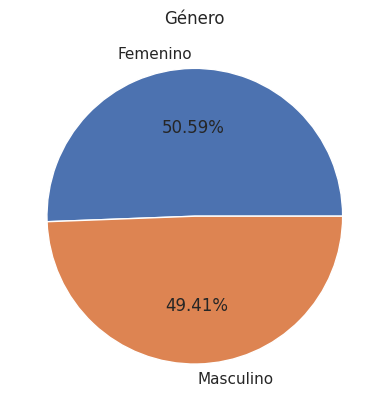

In [35]:
# Grafico de torta
frecuencia_genero = df['Genero'].value_counts() #Cantidad de clientes de cada genero
plt.pie(frecuencia_genero, labels=frecuencia_genero.index, autopct='%1.2f%%') #Grafico de torta
plt.title("Género") #Titulo del grafico
plt.show() #Mostrar grafico

In [36]:
#Frecuencia
df['Estado_Civil'].value_counts()

,count
Estado_Civil,
Soltero(a),125249
Casado(a),53904
Viudo(a),18704


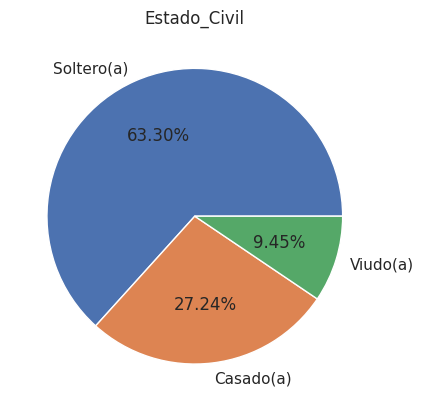

In [37]:
# Grafico de torta
frecuencia_estadocivil = df['Estado_Civil'].value_counts()
plt.pie(frecuencia_estadocivil, labels=frecuencia_estadocivil.index, autopct='%1.2f%%')
plt.title("Estado_Civil")
plt.show()

In [38]:
#Frecuencia
df['Seguro'].value_counts()

,count
Seguro,
Automotriz,62151
Salud,41248
Desgravamen,33618
Vida,23024
Viaje,13208
Robo,12400
Accidente,12208


Text(0.5, 1.0, 'Tipos de Seguro')

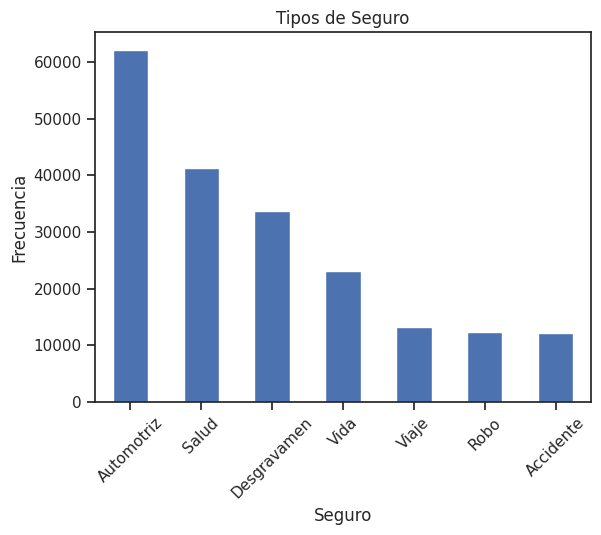

In [45]:
# Grafico de barra
df['Seguro'].value_counts().plot.bar(rot=45) #Grafico de barras
plt.xlabel("Seguro")
plt.ylabel("Frecuencia")
plt.title("Tipos de Seguro")

In [41]:
# Frecuencia
df['Region'].value_counts()

,count
Region,
Metropolitana,80632
Biobío,28864
O'Higgins,17056
Valparaíso,15864
Los Lagos,11729
Ñuble,11336
Arica y Parinacota,10264
Coquimbo,5800
Atacama,5144


Text(0.5, 1.0, 'Región')

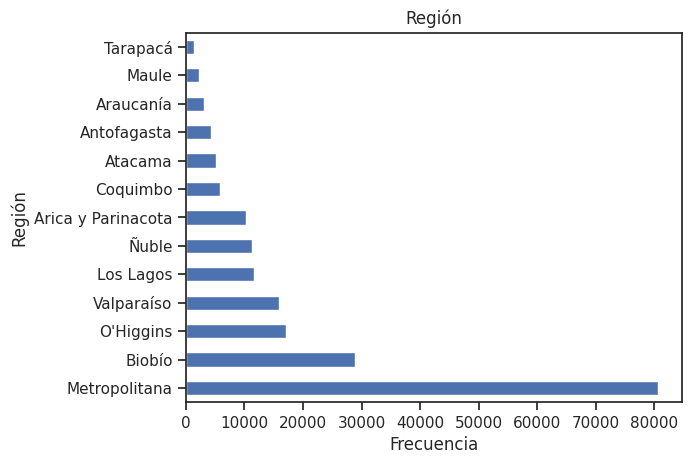

In [42]:
# Grafico de barras horizontales
df['Region'].value_counts().plot.barh()#Gráfico de barras horizontal
plt.xlabel("Frecuencia")
plt.ylabel("Región")
plt.title("Región")

In [43]:
# Cantidad por ciudad
df['Ciudad'].value_counts(sort=True)

,count
Ciudad,
Santiago,77704
Concepción,21632
Rancagua,17056
Valparaíso,15864
Chillán,11336
Arica,10264
Osorno,7456
Los Ángeles,7232
Copiapó,5144


Text(0.5, 1.0, 'Ciudad')

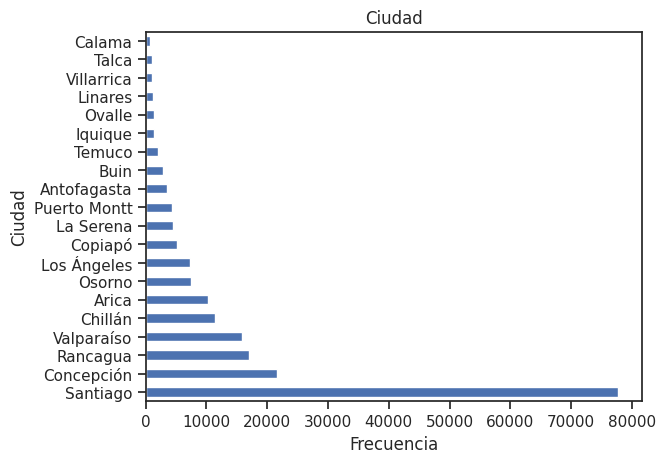

In [44]:
# Grafico de barras horizontales
df['Ciudad'].value_counts(sort=True).plot.barh()#Gráfico de barras horizontal
plt.xlabel("Frecuencia")
plt.ylabel("Ciudad")
plt.title("Ciudad")

## **3.2. Medidas de Tendencia Central**

In [46]:
# Establecer el formato de punto flotante a 2 decimales
pd.options.display.float_format = '{:.2f}'.format

In [47]:
#Resumen estadistico
df.describe()

,N°_Hijos,Cupo_TC,Gasto_Mensual
count,197857.00,197857.00,197857.00
mean,1.87,1447879.05,1687655.87
std,1.56,868702.18,1672320.43
min,0.00,0.00,0.00
25%,1.00,1000000.00,717119.00
50%,2.00,1000000.00,936583.00
75%,3.00,2000000.00,1939240.00
max,5.00,5000000.00,7298120.00


In [48]:
#Moda de todas las variables
df.mode().iloc[0]

,0
Seguro,Automotriz
Genero,Femenino
Ciudad,Santiago
Region,Metropolitana
Estado_Civil,Soltero(a)
Educacion,Técnico
N°_Hijos,0
Cupo_TC,1000000
Gasto_Mensual,2499900


In [49]:
# Filtra solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number'])
columnas_numericas.head()

,N°_Hijos,Cupo_TC,Gasto_Mensual
0,5,1000000,530661
1,1,1000000,904428
2,0,1000000,704975
3,4,1000000,767575
4,4,1000000,995146


In [50]:
#Media de variables numericas
columnas_numericas.mean()

,0
N°_Hijos,1.87
Cupo_TC,1447879.05
Gasto_Mensual,1687655.87


In [51]:
#Mediana de variables numericas
columnas_numericas.median()

,0
N°_Hijos,2.00
Cupo_TC,1000000.00
Gasto_Mensual,936583.00


## **3.3. Distribución**

▶ Asimetría

coeficiente = 0 ➞ simétrica

coeficiente > 0 ➞ asimétrica positiva

coeficiente < 0 ➞ asimétrica negativa

In [52]:
from scipy.stats import skew

In [53]:
skew(df['Gasto_Mensual'])

1.8471805761339697

In [54]:
# Calcula la asimetría para cada columna numérica
for columna in columnas_numericas:
    asimetria = skew(df[columna])
    print(f"Asimetría de Pearson para '{columna}': {asimetria}")

Asimetría de Pearson para 'N°_Hijos': 0.4666322252420068
Asimetría de Pearson para 'Cupo_TC': 1.5363376359597922
Asimetría de Pearson para 'Gasto_Mensual': 1.8471805761339697


▶ Curtosis

coeficiente = 0 ➞ mesocúrtica

coeficiente > 0 ➞ leptocúrtica

coeficiente < 0 ➞ platicúrtica

In [55]:
from scipy.stats import kurtosis

In [56]:
kurtosis(df['Gasto_Mensual'], fisher=True)

2.3666091022749693

In [57]:
# Calcula la curtosis de Fisher para cada columna numérica
for columna in columnas_numericas:
    curtosis = kurtosis(df[columna], fisher=True)
    print(f"Curtosis de Fisher para '{columna}': {curtosis}")

Curtosis de Fisher para 'N°_Hijos': -0.8338803899716569
Curtosis de Fisher para 'Cupo_TC': 2.2526977137191952
Curtosis de Fisher para 'Gasto_Mensual': 2.3666091022749693


▶ Función de densidad

In [58]:
import seaborn as sb

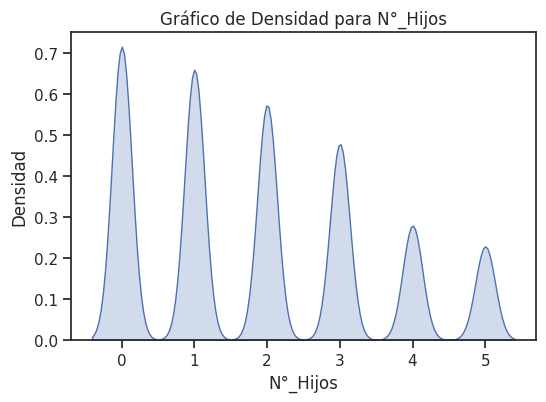

In [60]:
# Gráfico de densidad
plt.figure(figsize=(6, 4))
sb.kdeplot(df['N°_Hijos'], shade=True)
plt.ticklabel_format(useOffset=False, style='plain' )  # Quitar notación científica
plt.xlabel("N°_Hijos")
plt.ylabel("Densidad")
plt.title("Gráfico de Densidad para N°_Hijos")
plt.show()

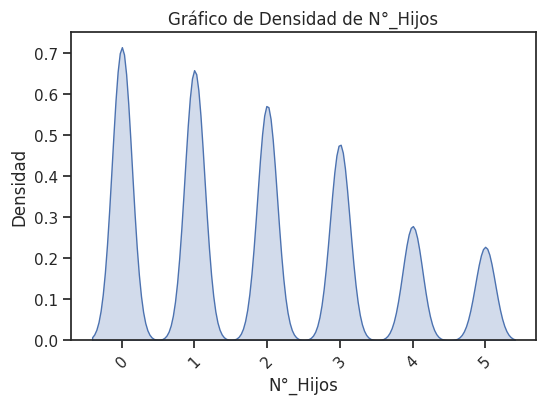

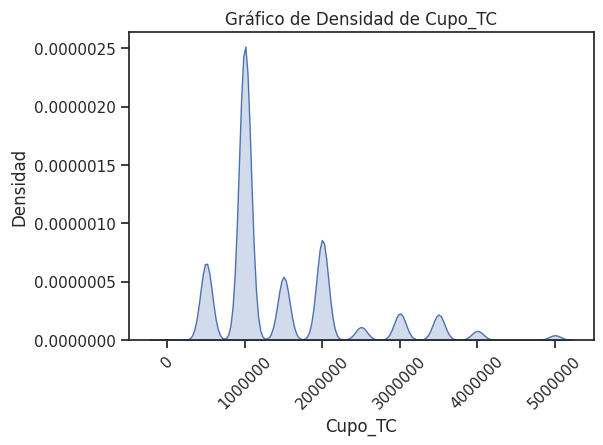

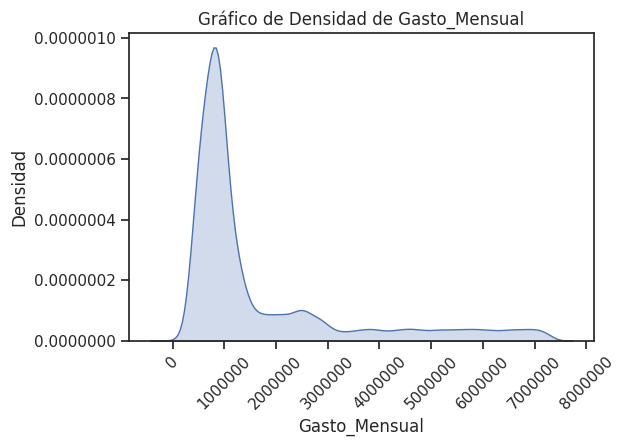

In [61]:
# Itera a través de las columnas numéricas y crea gráficos de densidad
for column in columnas_numericas.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    sb.kdeplot(df[column], shade=True)  # Gráfico de densidad
    plt.ticklabel_format(useOffset=False, style='plain' )  # Quitar notación científica
    plt.xticks(rotation=45) # Rotar etiquetas del eje X
    plt.xlabel(column)  # Título del eje x con el nombre de la columna
    plt.ylabel("Densidad")  # Título del eje Y
    plt.title(f"Gráfico de Densidad de {column}")  # Título del gráfico
    plt.show()  # Mostrar el gráfico

▶ Histograma

Text(0.5, 1.0, 'Gasto mensual')

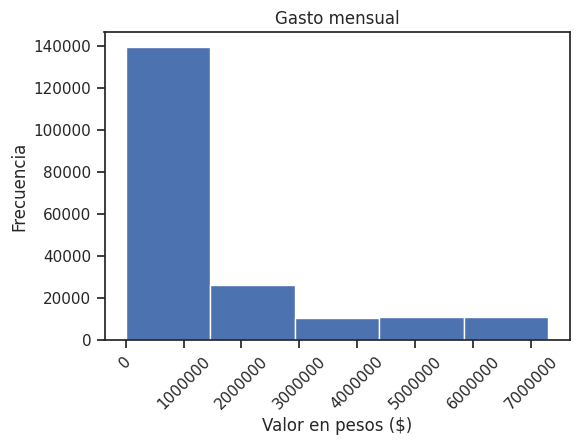

In [62]:
# Histograma
plt.figure(figsize=(6,4))
plt.hist(df['Gasto_Mensual'], bins=5) # bins es el numero de barras
plt.xticks(rotation=45) #Rotar etiquetas del eje X
plt.xlabel("Valor en pesos ($)")
plt.ylabel("Frecuencia")
plt.title("Gasto mensual")

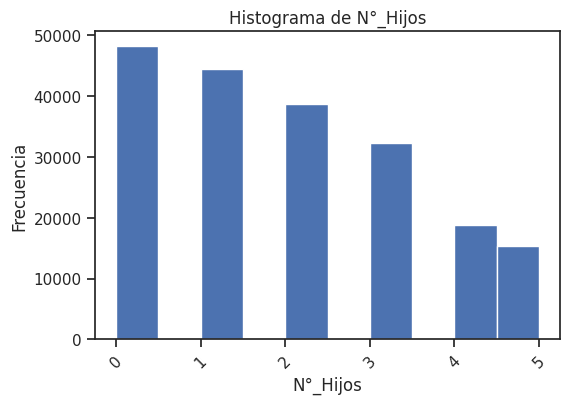

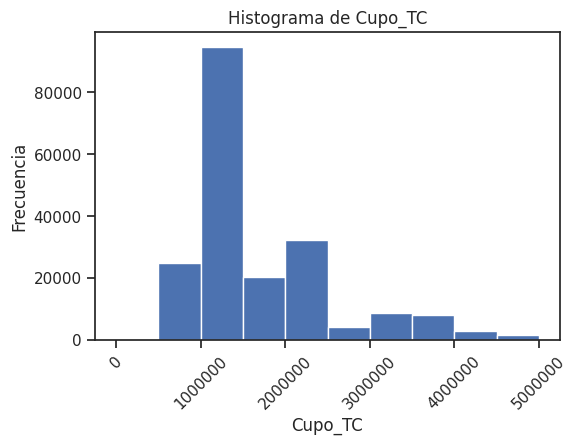

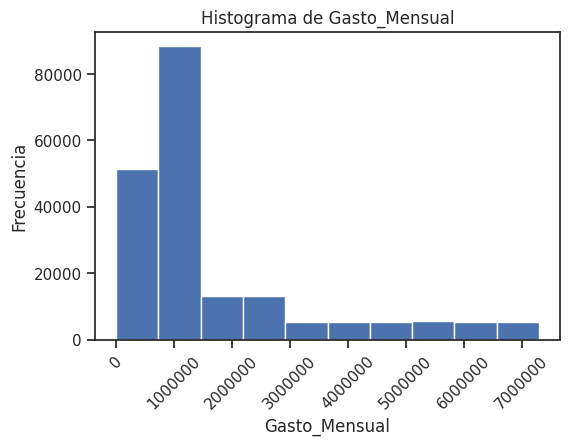

In [63]:
# Itera a través de las columnas numéricas y crea histogramas
for column in columnas_numericas.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    plt.hist(x=df[column])  # Gráfico de histograma
    plt.xticks(rotation=45) # Rotar etiquetas del eje X
    plt.xlabel(column)  # Título del eje x con el nombre de la columna
    plt.ylabel("Frecuencia")  # Título del eje Y
    plt.title(f"Histograma de {column}")  # Título del gráfico
    plt.show()  # Mostrar el gráfico

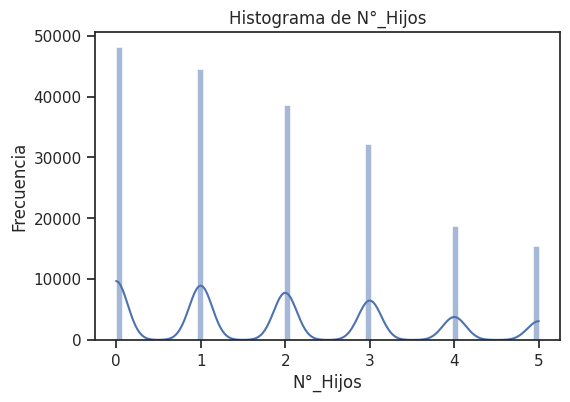

In [65]:
# Histogramas + funcion de densidad
plt.figure(figsize=(6, 4))
sb.histplot(df['N°_Hijos'],kde=True)
plt.ticklabel_format(useOffset=False, style='plain' )  # Quitar notación científica
plt.xlabel('N°_Hijos')
plt.ylabel("Frecuencia")
plt.title(f"Histograma de N°_Hijos")
plt.show()

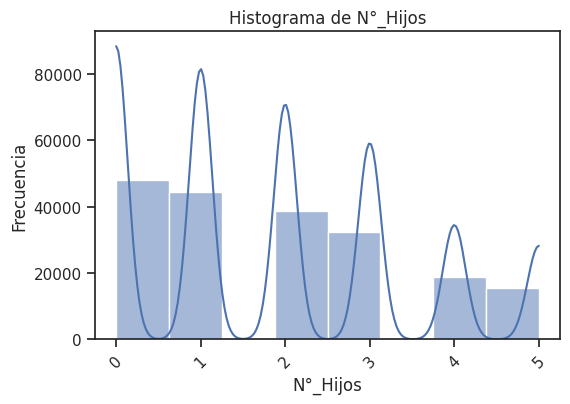

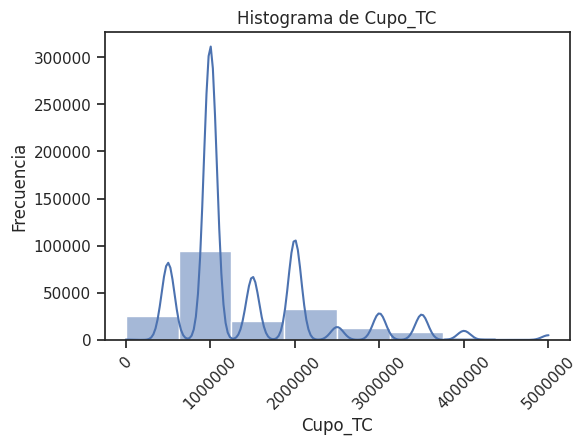

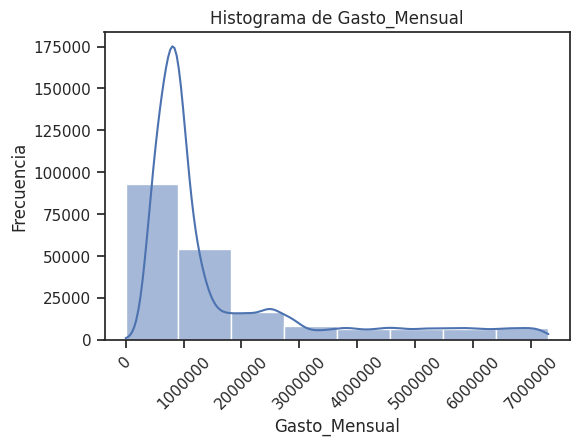

In [66]:
# Itera a través de las columnas numéricas y crea histogramas + funcion de densidad
for column in columnas_numericas.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    sb.histplot(x=df[column],kde=True, bins=8)  # Gráfico de histograma + KDE
    plt.ticklabel_format(useOffset=False, style='plain')  # Quitar notación científica
    plt.xticks(rotation=45) # Rotar etiquetas del eje X
    plt.xlabel(column)  # Título del eje x con el nombre de la columna
    plt.ylabel("Frecuencia")  # Título del eje Y
    plt.title(f"Histograma de {column}")  # Título del gráfico
    plt.show()  # Mostrar el gráfico

## **3.4. Medidas de Dispersión**

In [67]:
#Varianza
columnas_numericas.var()

,0
N°_Hijos,2.43
Cupo_TC,754643477002.05
Gasto_Mensual,2796655611891.64


In [68]:
#Desviación Estandar
columnas_numericas.std()

,0
N°_Hijos,1.56
Cupo_TC,868702.18
Gasto_Mensual,1672320.43


## **3.5. Medidas de Posición**

In [69]:
# Las medidas de posicion son los cuartiles (4 partes iguales)
# Q1 = 25%
# Q2 = 50% (mediana)
# Q3 = 75%
df.describe()

,N°_Hijos,Cupo_TC,Gasto_Mensual
count,197857.00,197857.00,197857.00
mean,1.87,1447879.05,1687655.87
std,1.56,868702.18,1672320.43
min,0.00,0.00,0.00
25%,1.00,1000000.00,717119.00
50%,2.00,1000000.00,936583.00
75%,3.00,2000000.00,1939240.00
max,5.00,5000000.00,7298120.00


In [71]:
from scipy.stats import iqr
# Rango intercuartil
print("IQR N° Hijos:", iqr(df['N°_Hijos']))
print("IQR Cupo TC:", iqr(df['Cupo_TC']))
print("IQR Gasto Mensual:", iqr(df['Gasto_Mensual']))

IQR N° Hijos: 2.0
IQR Cupo TC: 1000000.0
IQR Gasto Mensual: 1222121.0


▶ Diagrama de caja y bigotes (boxplot)

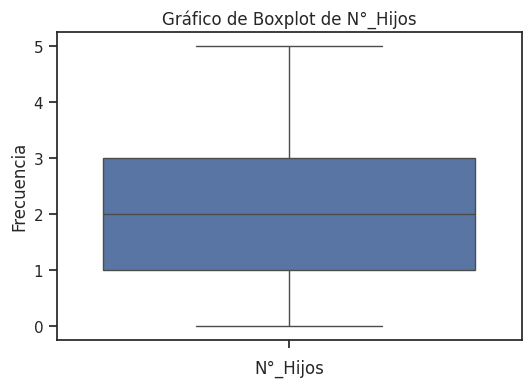

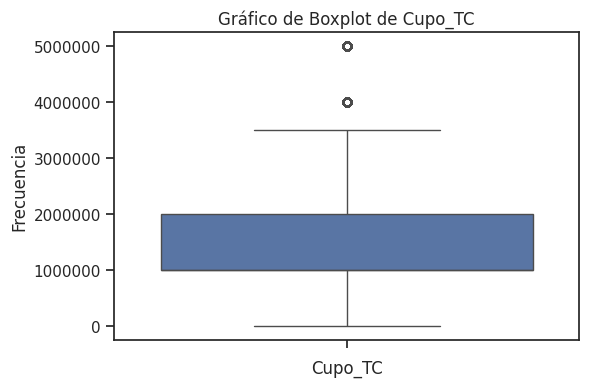

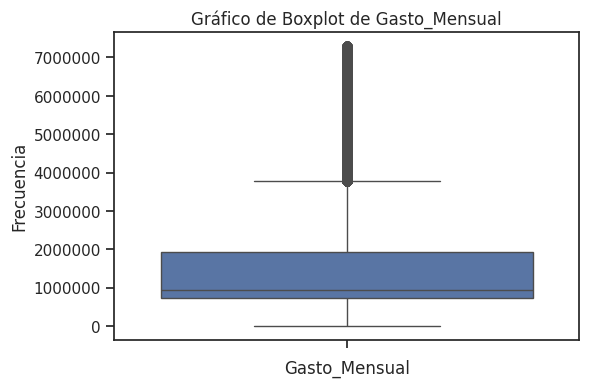

In [72]:
# Itera a través de las columnas numéricas y crea gráficos de boxplot
for column in columnas_numericas.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    boxplot(df[column])  # Gráfico de densidad
    plt.xlabel(column)  # Título del eje x con el nombre de la columna
    plt.ylabel("Frecuencia")  # Título del eje Y
    plt.title(f"Gráfico de Boxplot de {column}")  # Título del gráfico
    plt.show()  # Mostrar el gráfico

Text(0.5, 1.0, 'Gasto mensual por genero')

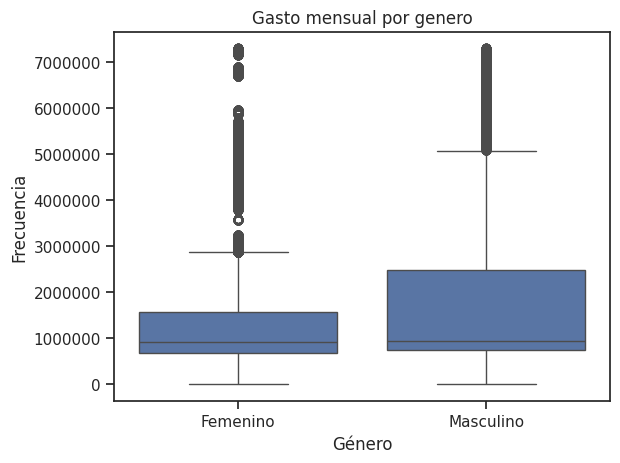

In [73]:
boxplot(x="Genero", y="Gasto_Mensual", data=df) #Diagrama de caja y bigotes
plt.xlabel("Género") #Titulo de eje x
plt.ylabel("Frecuencia") #Titulo de eje y
plt.title("Gasto mensual por genero") #Titulo del grafico

Text(0.5, 1.0, 'Ingreso mensual por Cupo TC')

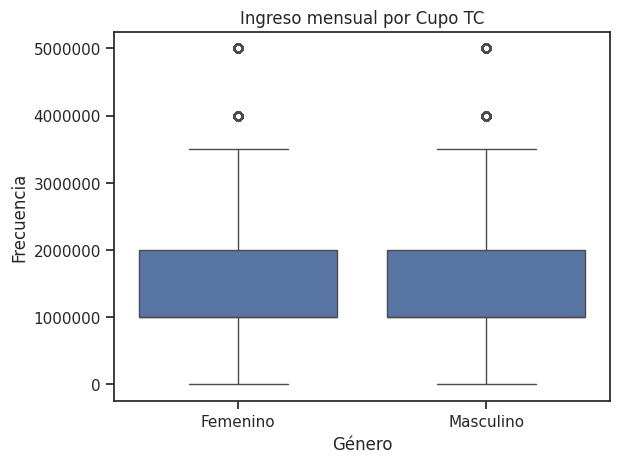

In [75]:
boxplot(x="Genero", y="Cupo_TC", data=df) #Diagrama de caja y bigotes
plt.xlabel("Género") #Titulo de eje x
plt.ylabel("Frecuencia") #Titulo de eje y
plt.title("Ingreso mensual por Cupo TC") #Titulo del grafico

Text(0.5, 1.0, 'Gasto mensual por estado civil')

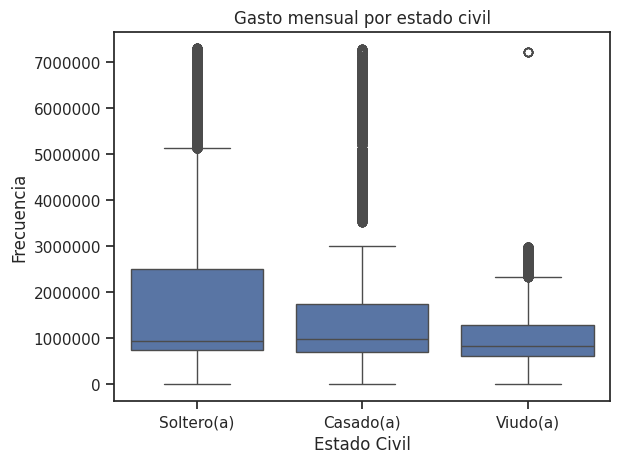

In [77]:
boxplot(x="Estado_Civil", y="Gasto_Mensual", data=df)
plt.xlabel("Estado Civil")
plt.ylabel("Frecuencia")
plt.title("Gasto mensual por estado civil")

Text(0.5, 1.0, 'Gasto mensual por N° Hijos')

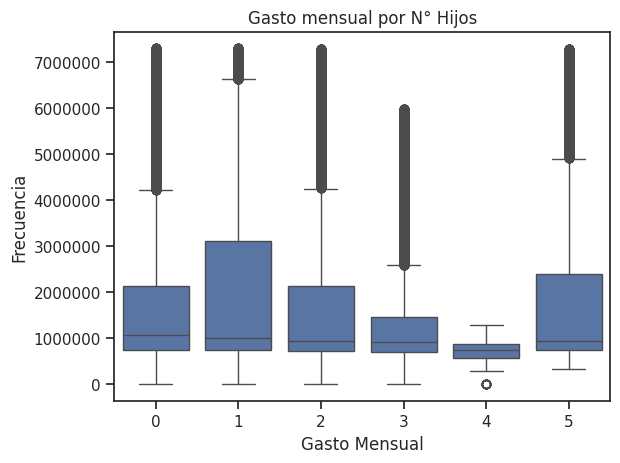

In [80]:
boxplot(x="N°_Hijos", y="Gasto_Mensual", data=df)
plt.xlabel("Gasto Mensual")
plt.ylabel("Frecuencia")
plt.title("Gasto mensual por N° Hijos")

## **3.6. Correlación**

▶ Coeficiente de correlación

coeficiente = 0 ➞ no hay relación

coeficiente > 0 ➞ relación directa

coeficiente < 0 ➞ relación inversa

In [81]:
#Correlacion de todas las variables con Gasto Mensual
r = columnas_numericas.corr()
r["Gasto_Mensual"].sort_values(ascending=False)

,Gasto_Mensual
Gasto_Mensual,1.00
Cupo_TC,0.92
N°_Hijos,-0.12


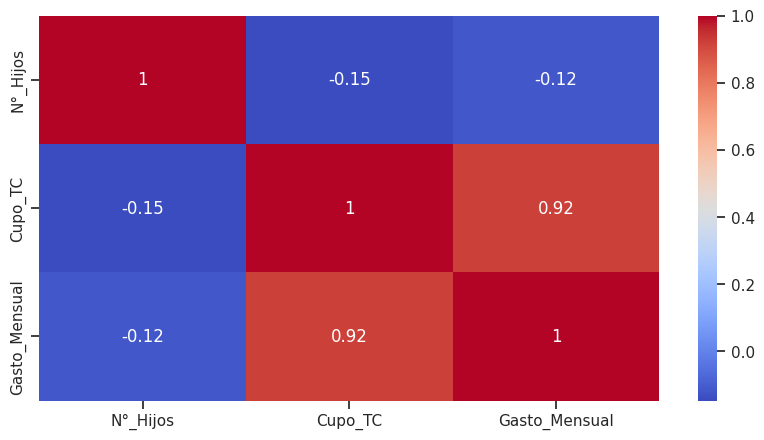

In [82]:
#Matriz de correlacion
corr = columnas_numericas.corr()
plt.figure(figsize=(10,5))
sb.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

▶ Diagrama de Dispersión

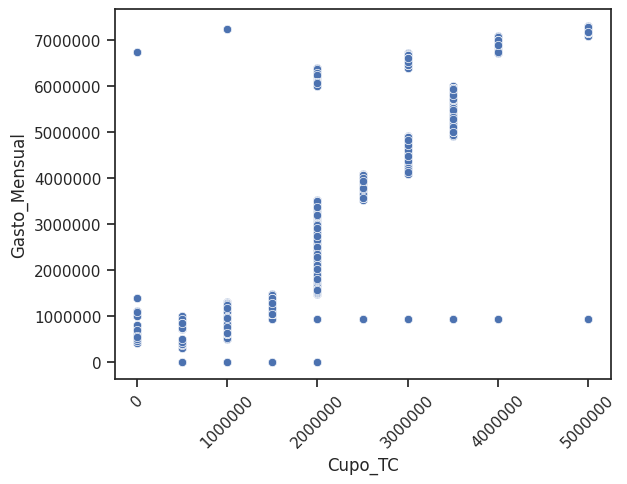

In [85]:
sb.scatterplot(x=df.Cupo_TC, y=df.Gasto_Mensual, data=df)
plt.xticks(rotation=45) #rotar etiquetas del eje X
plt.show()

# **4. REPORTE (opcional)**

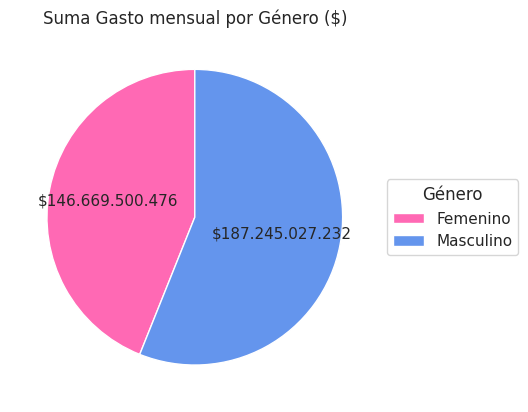

In [86]:
# Calcular el gasto total por género
monto = df.groupby('Genero')['Gasto_Mensual'].sum()

# Formatear los montos como etiquetas en formato de moneda
etiquetas = ['${:,.0f}'.format(valor).replace(',', '.') for valor in monto]

# Nombres de género y colores correspondientes
nombres_genero = monto.index
colores = ['#FF69B4', '#6495ED']

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots()

# Generar el gráfico de pastel con montos como etiquetas
_, textos, _ = ax.pie(monto, labels=etiquetas, colors=colores, autopct='', startangle=90, labeldistance=0.6)

# Ajustar la alineación de los textos dentro de las porciones del gráfico
for texto in textos:
    texto.set_horizontalalignment('center')
    texto.set_verticalalignment('center')

# Configurar título y leyenda
plt.title("Suma Gasto mensual por Género ($)")
plt.legend(nombres_genero, title="Género", loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

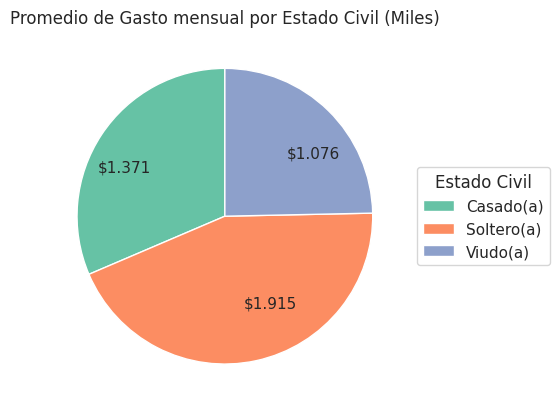

In [87]:
# Calcular promedio del gasto mensual por estado civil
monto = df.groupby('Estado_Civil')['Gasto_Mensual'].mean()/1000

# Formatear los montos como etiquetas en formato de moneda
etiquetas = ['${:,.0f}'.format(valor).replace(',', '.') for valor in monto]

# Nombres  y colores correspondientes
nombres = monto.index
colores = sb.color_palette('Set2', n_colors=len(nombres))

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots()

# Generar el gráfico de pastel con el monto de los productos vendidos
_, _, porciones = plt.pie(monto, labels=etiquetas, colors=colores, autopct='', startangle=90, labeldistance=0.6)

# Ajustar automáticamente el espaciado del gráfico de pastel
plt.gca().set_aspect('equal')  # Asegurar una forma de círculo

# Configurar título y leyenda
plt.title("Promedio de Gasto mensual por Estado Civil (Miles)")
plt.legend(nombres, title="Estado Civil", loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico de pastel
plt.show()

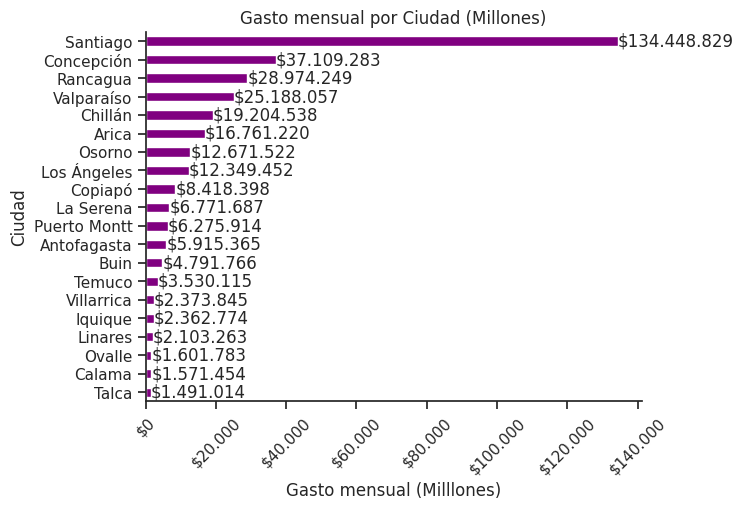

In [90]:
# Gasto mensual por ciudad
monto = df.groupby('Ciudad')['Gasto_Mensual'].sum() / 1000000

# Ordenar los montos de manera descendente
monto_ordenado = monto.sort_values(ascending=True)

# Generar el gráfico de barras horizontales
ax = monto_ordenado.plot(kind='barh', color='purple')

# Configurar etiquetas y título
plt.xlabel("Gasto mensual (Milllones)")
plt.ylabel("Ciudad")
plt.title("Gasto mensual por Ciudad (Millones)")

# Establecer formato de las etiquetas del eje x
formatter = ticker.StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(formatter)

# Reemplazar comas por puntos en las etiquetas del eje x
ax.xaxis.set_ticklabels([label.get_text().replace(",", ".") for label in ax.get_xticklabels()])

# Ajustar la rotación de las etiquetas del eje x
ax.tick_params(axis='x', rotation=45)

# Eliminar las líneas de enmarcado del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Agregar etiquetas de suma de montos sobre las barras
for rect in ax.patches:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, "${:,.0f}".format(width * 1000).replace(",", "."), ha='left', va='center')

# Mostrar el gráfico de barras horizontales
plt.show()


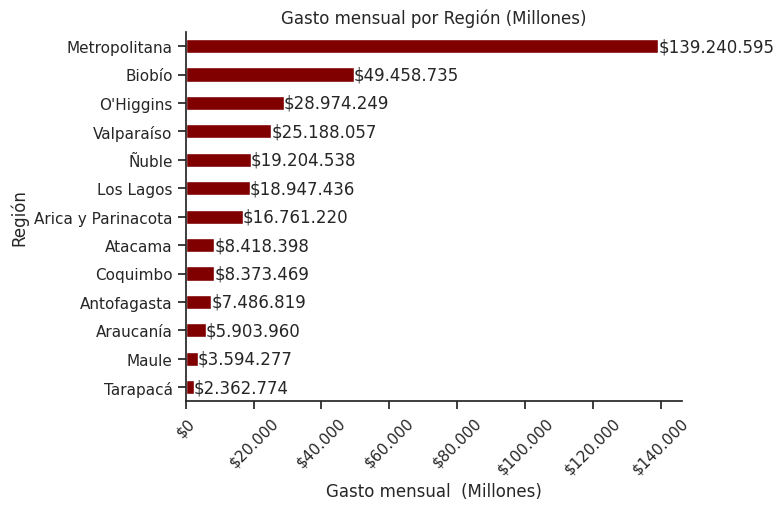

In [91]:
# Gasto Mensual por region
monto = df.groupby('Region')['Gasto_Mensual'].sum() / 1000000

# Ordenar los montos de manera descendente
monto_ordenado = monto.sort_values(ascending=True)

# Generar el gráfico de barras horizontales
ax = monto_ordenado.plot(kind='barh', color='maroon')

# Configurar etiquetas y título
plt.xlabel("Gasto mensual  (Millones)")
plt.ylabel("Región")
plt.title("Gasto mensual por Región (Millones)")

# Establecer formato de las etiquetas del eje x
formatter = ticker.StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(formatter)

# Reemplazar comas por puntos en las etiquetas del eje x
ax.xaxis.set_ticklabels([label.get_text().replace(",", ".") for label in ax.get_xticklabels()])

# Ajustar la rotación de las etiquetas del eje x
ax.tick_params(axis='x', rotation=45)

# Eliminar las líneas de enmarcado del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Agregar etiquetas de suma de montos sobre las barras
for rect in ax.patches:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, "${:,.0f}".format(width * 1000).replace(",", "."), ha='left', va='center')

# Mostrar el gráfico de barras horizontales
plt.show()


# **5. CONCLUSIONES**

In [95]:
# Hallazgos:
print(f". La mayoría de los clientes son del género: {df['Genero'].mode()[0]}")
print(f". La región donde hay más clientes es: {df['Region'].mode()[0]}")
print(f". La ciudad donde hay menos clientes es: {df['Ciudad'].value_counts().idxmin()}")
print(f". La mayoría de los clientes es de estado civil: {df['Estado_Civil'].mode()[0]}")
print(f". El promedio de gasto mensual por cliente es: ${round(df['Gasto_Mensual'].mean())}")
print(f". El promedio del Cupo_TC por cliente es: ${round(df['Cupo_TC'].mean())}")


. La mayoría de los clientes son del género: Femenino
. La región donde hay más clientes es: Metropolitana
. La ciudad donde hay menos clientes es: Calama
. La mayoría de los clientes es de estado civil: Soltero(a)
. El promedio de gasto mensual por cliente es: $1687656
. El promedio del Cupo_TC por cliente es: $1447879


---
---
# **DOCUMENTACIÓN**

NumPy. (n.d.). User guide. NumPy. Retrieved December 15, 2024, from https://numpy.org/devdocs/user/index.html#user

pandas. (n.d.). User guide. pandas. Retrieved December 15, 2024, from https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib. (n.d.). User guide. Matplotlib. Retrieved December 15, 2024, from https://matplotlib.org/stable/users/index.html

Seaborn. (n.d.). Tutorial. Seaborn. Retrieved December 15, 2024, from https://seaborn.pydata.org/tutorial.html

Matplotlib. (n.d.). Named colors. Matplotlib. Retrieved December 15, 2024, from https://matplotlib.org/stable/gallery/color/named_colors.html